In [1]:
import numpy as _np
import matplotlib.pyplot as _plt
import pandas as _pd
import glob as _gl
import pymad8 as _m8
import pybdsim as _bd
import beamGas

date = "2022_11_04"
save_name_prefix = "plots/" + date + "_T20_plot"

Welcome to JupyROOT 6.26/04


In [2]:
Twissfile = "../01_mad8/TWISS_CL_T20"
Rmatfile = "../01_mad8/RMAT_CL_T20"

paramdict = {'x' : {'mean': 0, 'std': 10e-6},
             'xp': {'mean': 0, 'std': 10e-6},
             'y' : {'mean': 0, 'std': 10e-6},
             'yp': {'mean': 0, 'std': 10e-6},
             'z' : {'mean': 0, 'std': 0},
             'DE': {'mean': 0, 'std': 0},
            }

Track_Collection = _m8.Sim.setTrackCollection(200, 14, paramdict)
Track = _m8.Sim.setSamplersAndTrack(Twissfile, Rmatfile, 500)

Track.RunPymad8Tracking(Track_Collection)

Mad8.readTwissFile > nrec=878
Mad8.readRmatFile > nrec=878
Mad8.tracking > 200 particles and 792 samplers


In [3]:
Gmadfile = "../03_bdsimModel/T20_dens_1e-12.gmad"
Outfile = "../04_dataLocal/TEST_T20_with_userfile"
# _bd.Run.Bdsim(Gmadfile, Outfile)
STOP

NameError: name 'STOP' is not defined

In [4]:
Rootfile = "../04_dataLocal/T20_no_bias_for_tracking.root"
Track.LoadBdsimTrack(Rootfile)

REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using Rebd

In [28]:
particle_number = 19
particle_initial_vector = Track.initial_dict[particle_number]
print("Particle {} with initial vector : {}".format(particle_number, particle_initial_vector))

#S=0
#S=53
#S=220.9
S=68.5
sampler_name = Track.twiss.getNameByNearestS(S)
sampler_S = Track.twiss.getRowByNearestS(S)['S'].tolist()[0]
print("Sampler {} at position S = {} m".format(sampler_name, sampler_S))

Particle 19 with initial vector : {'x': -1.2639144162602296e-06, 'px': -1.224358884339021e-05, 'y': 1.674808411940435e-05, 'py': 7.213797356522602e-07, 't': 0.0, 'deltap': 0.0}
Sampler QF.1.TL at position S = 68.50605 m


In [ ]:
_plt.figure(figsize=(14, 9))

_plt.subplot(2, 1, 1)
for particle_number in range(10,20):
    Track.PlotTrajectory(particle_number, 'X')
_plt.axvline(S)

_plt.subplot(2, 1, 2)
for particle_number in range(10,20):
    Track.PlotTrajectory(particle_number, 'Y')
    
_m8.Plot.AddMachineLatticeToFigure(_plt.gcf(), Track.twiss)
_plt.title("Sample of particle trajectories in both planes", fontsize=15)
    
_plt.savefig("{}_Multiple_Particle_trajectories_both_planes".format(save_name_prefix), dpi=300)

In [ ]:
_plt.figure(figsize=(14, 15))

_plt.subplot(4, 1, 1)
Track.PlotTrajectory(particle_number, 'X', bdsimCompare=True)

_plt.subplot(4, 1, 2)
Track.PlotTrajectory(particle_number, 'Y', bdsimCompare=True)

_plt.subplot(4, 1, 3)
Track.PlotTrajectory(particle_number, 'X', bdsimCompare=True, relativePlots=True)
Track.PlotTrajectory(particle_number, 'Y', bdsimCompare=True, relativePlots=True)

if True:
    _plt.subplot(4, 1, 4)
    Track.twiss.plotXY('S', 'DX')
    Track.twiss.plotXY('S', 'DY')
    _plt.xlabel('S [m]')
    _plt.ylabel('Disp [m]')
    _plt.legend()

_m8.Plot.AddMachineLatticeToFigure(_plt.gcf(), Track.twiss)
_plt.title("Particle trajectory in both planes", fontsize=15)

_plt.savefig("{}_Particle_trajectory_both_planes".format(save_name_prefix), dpi=300)

In [ ]:
_plt.figure(figsize=(14, 9))

_plt.subplot(3, 1, 1)
Track.PlotTrajectory(particle_number, 'PX', bdsimCompare=True)

_plt.subplot(3, 1, 2)
Track.PlotTrajectory(particle_number, 'PY', bdsimCompare=True)

_plt.subplot(3, 1, 3)
Track.PlotTrajectory(particle_number, 'PX', bdsimCompare=True, relativePlots=True)
Track.PlotTrajectory(particle_number, 'PY', bdsimCompare=True, relativePlots=True)

if False :
    _plt.subplot(3, 1, 3)
    Track.twiss.plotXY('S', 'DPX')
    Track.twiss.plotXY('S', 'DPY')
    _plt.xlabel('S [m]')
    _plt.ylabel('Disp_p [rad]')
    _plt.legend()

_m8.Plot.AddMachineLatticeToFigure(_plt.gcf(), Track.twiss)
_plt.title("Particle angular trajectory in both planes", fontsize=15)

_plt.savefig("{}_Particle_trajectory_derivate_both_planes".format(save_name_prefix), dpi=300)

In [ ]:
_plt.figure(figsize=(21, 6))

_plt.subplot(1, 3, 1)
Track.PlotPhaseSpace(S, 'X', linFit=True)

_plt.subplot(1, 3, 2)
Track.PlotPhaseSpace(S, 'Y', linFit=True)

_plt.subplot(1, 3, 3)
Track.PlotPhaseSpace(S, 'T')

_plt.savefig("{}_Phase_space_at_one_sampler_in_both_planes".format(save_name_prefix), dpi=300)

In [ ]:
_plt.figure(figsize=(21, 12))

_plt.subplot(2, 3, 1)
Track.PlotHist(S, 'X')

_plt.subplot(2, 3, 2)
Track.PlotHist(S, 'Y')

_plt.subplot(2, 3, 3)
Track.PlotHist(S, 'T')

_plt.subplot(2, 3, 4)
Track.PlotHist(S, 'PX')

_plt.subplot(2, 3, 5)
Track.PlotHist(S, 'PY')

_plt.subplot(2, 3, 6)
Track.PlotHist(S, 'PT')


_plt.savefig("{}_Beam_profile_at_one_sampler_in_all_coordinates".format(save_name_prefix), dpi=300)

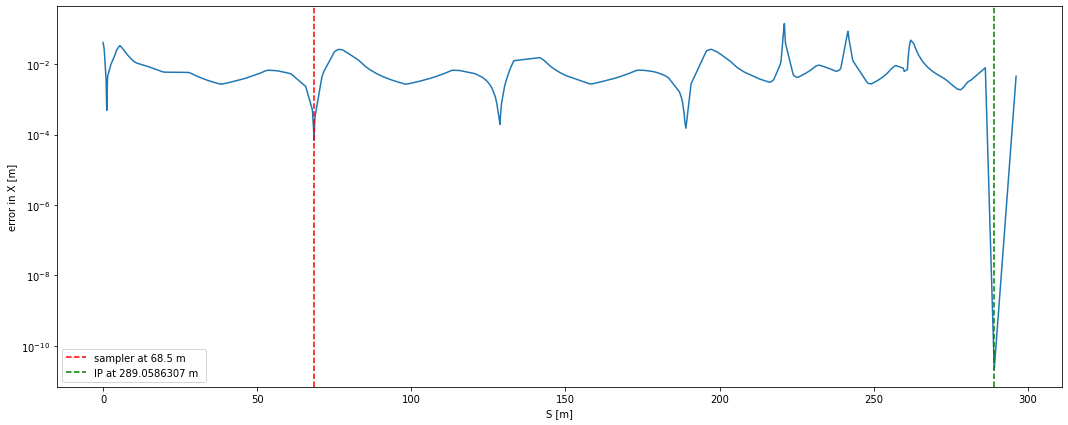

In [33]:
ref_index = Track.twiss.getIndexByNames('IP.LUXE.T20')
ref_S = Track.twiss.getRowsByNames('IP.LUXE.T20')['S'].tolist()[0]
S_vect = []
SLOPE = []
ERR = []
for index in range(878):
    try:
        slope, err = Track.PlotCorrelation(index, 'X', ref_index, 'X', linFit=True, noPlots=True)
        S_vect.append(Track.twiss.data['S'][index])
        SLOPE.append(slope)
        ERR.append(err)
    except:
        pass

_plt.figure(figsize=(18, 7))

_plt.plot(S_vect, ERR)
_plt.yscale("log")
_plt.axvline(S, ls='--', color='red', label='sampler at {} m '.format(S))
_plt.axvline(ref_S, ls='--', color='green', label='IP at {} m '.format(ref_S))
_plt.xlabel('S [m]')
_plt.ylabel('error in X [m]')
_plt.legend()

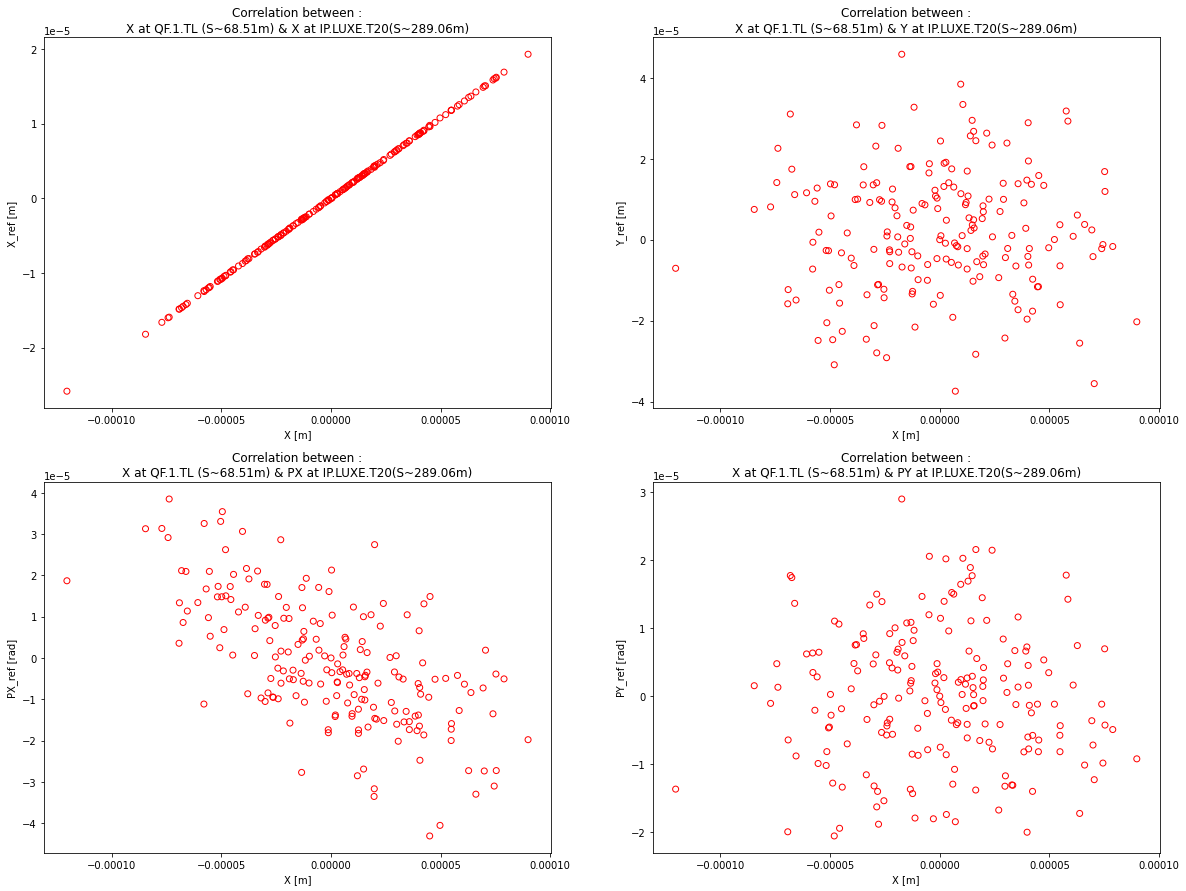

In [34]:
index = Track.twiss.getIndexByNearestS(S)
ref_index = Track.twiss.getIndexByNames('IP.LUXE.T20')

_plt.figure(figsize=(20, 15))

_plt.subplot(2, 2, 1)
Track.PlotCorrelation(index, 'X', ref_index, 'X')

_plt.subplot(2, 2, 2)
Track.PlotCorrelation(index, 'X', ref_index, 'Y')

_plt.subplot(2, 2, 3)
Track.PlotCorrelation(index, 'X', ref_index, 'PX')

_plt.subplot(2, 2, 4)
Track.PlotCorrelation(index, 'X', ref_index, 'PY')


_plt.savefig("{}_Beam_profile_at_one_sampler_compared_to_IP_in_all_coordinates".format(save_name_prefix), dpi=300)

In [ ]:
_plt.figure(figsize=(14, 9))

MUX_IP = Track.twiss.getRowsByNames('IP.LUXE.T20')['MUX']
MUY_IP = Track.twiss.getRowsByNames('IP.LUXE.T20')['MUY']

Track.twiss.plotXY('S', 'MUX')
Track.twiss.plotXY('S', 'MUY')
_plt.axhline(y=MUX_IP.values[0]-_np.pi, color='C0', ls='--', label='MUX_IP - $\pi$')
_plt.axhline(y=MUY_IP.values[0]-_np.pi, color='C1', ls='--', label='MUY_IP - $\pi$')
_plt.axvline(60)
_plt.xlabel('S [m]')
_plt.ylabel('Mu [rad]')
_plt.legend()

_m8.Plot.AddMachineLatticeToFigure(_plt.gcf(), Track.twiss)
_plt.title("Phase advance in both planes", fontsize=15)

_plt.savefig("{}_Phase_advance_in_both_planes".format(save_name_prefix), dpi=300)

value = MUX_IP.values[0]-_np.pi
print(value)
print(Track.twiss.getRowsByValues(key='MUX', minValue=value-0.01, maxValue=value+0.01)[['NAME','TYPE','S','MUX']])